In [13]:
import pandas as pd
import numpy as np
import sklearn
import warnings
import nltk
nltk.download('vader_lexicon')
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\roibe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Project Name: Text Classification

#### Description
In this project, I'll take a set of labeled movie reviews and build a logistic regression model that classifies the sentiment of the movie reviews.  
I'll also show the advantage of this model over the built-in **VADER** method of NLTK: Sentiment Intensity Analyzer.

#### Table of Contents

##### Part 1: Using VADER
1. Classifying the movie reviews using **VADER**.  
2. Measuring its classification abilities using a **confusion matrix**.

##### Part 2: Logistic Regression Model
Building my own Logistic Regression model for sentiment analysis:  
3. Vectorize each review using **TF-IDF** (Term Frequency – Inverse Document Frequency).  
4. Split the data into training and test sets, and fit the logistic regression model on the training data.  
5. After fitting the model, examine its quality on the test set by presenting the **confusion matrix**.  
6. **Bonus:** Classifying my own review using the model.


##### 📚 Dataset
This project uses the [IMDb Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), originally uploaded to Kaggle by [Lakshmi Narayana Patthi](https://www.kaggle.com/lakshmi25npathi).  
**License:** [CC0 1.0 Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)


In [14]:
df = pd.read_csv('imdb-dataset-of-50k-movie-reviews.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   review      50000 non-null  object
 2   sentiment   50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
# Part 1:
# 1. Classifying the move reviews using vader

In [17]:
sid = SentimentIntensityAnalyzer()

In [20]:
sampled_df = df.sample(frac=0.1, random_state=42)

In [21]:
sampled_df['compund_polarity_score'] =  sampled_df.apply(lambda x: 
                                         sid.polarity_scores(x['review'])['compound'],axis = 1) 

In [24]:
sampled_df['predicted_sentiment'] = sampled_df['compund_polarity_score'].apply(lambda x:
                                                                              'positive' if x>=0 else 'negative')

In [ ]:
# 2. Measuring it classification abilities using a confusion matrix 

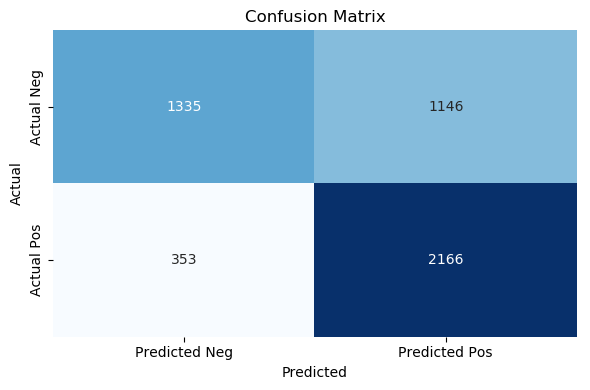

📊 Classification Report:

              precision    recall  f1-score   support

    Negative       0.79      0.54      0.64      2481
    Positive       0.65      0.86      0.74      2519

   micro avg       0.70      0.70      0.70      5000
   macro avg       0.72      0.70      0.69      5000
weighted avg       0.72      0.70      0.69      5000



In [32]:
# 1. Confusion Matrix
cm = confusion_matrix(sampled_df['sentiment'], sampled_df['predicted_sentiment'])
cm_df = pd.DataFrame(cm, index=["Actual Neg", "Actual Pos"], columns=["Predicted Neg", "Predicted Pos"])

# Display as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# 2. Classification Report
print("📊 Classification Report:\n")
print(classification_report(sampled_df['sentiment'],  sampled_df['predicted_sentiment'],
                            target_names=['Negative','Positive']))


In [ ]:
# Part 2:
# Building My own Logistic Regression model for sentiment analysis:  


In [6]:
# 3. Vectorize each review using Tfidf (term frequency  - inverse document frequency)
# Preprocessing for logistic regression using tfidf, dividing the set to texts and labels

In [33]:
X = df.review
y = df.sentiment

In [34]:
# 4. Spliting the data to traning and test, and fitting the logistic regression on the traning data
# spliting the data to train and test sets where the test is 1/3 of the data

In [36]:
 X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)

In [37]:
#here we vectorize each review using Tfidf and fit the logitic regression on the traning data

In [39]:
text_clf = Pipeline([('Tfidf',TfidfVectorizer()),('Logistic',LogisticRegression())])

In [40]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [41]:
predictions = text_clf.predict(X_test)

In [ ]:
# 5. Examine the model quality on the test set by presenting the confusion matrix

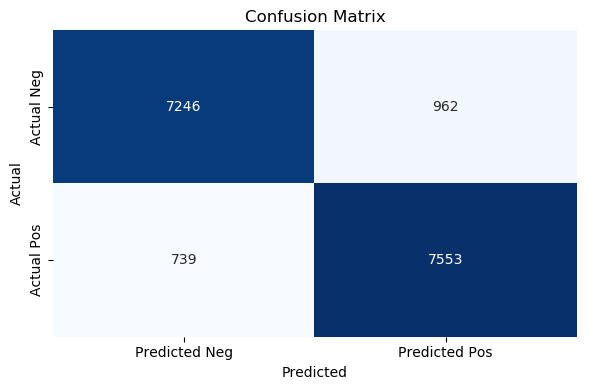

📊 Classification Report:

              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      8208
    Positive       0.89      0.91      0.90      8292

   micro avg       0.90      0.90      0.90     16500
   macro avg       0.90      0.90      0.90     16500
weighted avg       0.90      0.90      0.90     16500



In [50]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=["Actual Neg", "Actual Pos"], columns=["Predicted Neg", "Predicted Pos"])

# Display as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# 2. Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_test, predictions, target_names=['Negative','Positive']))


In [ ]:
# 6. Bonus: Classifying my own review using the model

In [19]:
my_movie_review = """
    Shepherds is a beautifully crafted film that immerses viewers in the tranquil yet demanding life of shepherding.
    Based on Mathyas Lefebure’s memoir, it tells the story of a Montreal advertising executive who, seeking a profound change, relocates to the French Alps to become a shepherd.
    The film captures the serene landscapes and the deep connection between humans and nature, offering a contemplative and soul-stirring experience.
    Its inclusion in TIFF’s annual Canada’s Top Ten list for 2024 underscores its cinematic excellence and emotional resonance.
"""


In [20]:
text_clf.predict([my_movie_review])[0]

'positive'